In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import date as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from sklearn.decomposition import PCA

from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
com = pd.read_csv("D:\\technocalobs\\2nd project\\Data_companies\companies.csv")
com.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [3]:
com.shape

(196553, 44)

In [4]:
com.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


Short description of our dataset, this will give us the short summary of dataset it gives the

counts

mean

standard deviation

minimum

1st quantile

2nd quantile

3rd quantile

maximum value of each columns.

In [5]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196530 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  logo_url         

Information about the dataset.

RangeIndex : 0 - 196552
    
columns : 44
    
dtypes : float(12), int(2), object(30)
    


In [6]:
com.duplicated().sum()

0

No duplicates present in our dataset.

In [7]:
com.isna().sum()

id                          0
Unnamed: 0.1                0
entity_type                 0
entity_id                   0
parent_id              196553
name                       23
normalized_name            26
permalink                   0
category_code           73367
status                      0
founded_at             105326
closed_at              193933
domain                  70008
homepage_url            70008
twitter_username       115962
logo_url                86443
logo_width              86443
logo_height             86443
short_description      189422
description            104505
overview                69582
tag_list               115101
country_code           108563
state_code             145650
city                   112663
region                      0
first_investment_at    193970
last_investment_at     193970
investment_rounds      193962
invested_companies     193962
first_funding_at       165046
last_funding_at        165046
funding_rounds         164846
funding_to

There are so many null values present in our dataset, there are only 9 columns with 0 null values and some of the columns are of completely null values or empty columns, also some of the columns only have few entries. So, going to drop all those unnecessary columns with all the null values and will not required in further analysis.

In [8]:
data = com.drop(columns = ['id','entity_type','permalink','region','created_by','Unnamed: 0.1','normalized_name','parent_id','domain','homepage_url','logo_url','logo_width','logo_height','overview','short_description','twitter_username','short_description','description','tag_list','state_code','city','first_investment_at', 'last_investment_at','first_milestone_at','last_milestone_at',  'first_funding_at','last_funding_at','lat','lng'])
data.head()

,entity_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,ROI
0,1,Wetpaint,web,operating,2005-10-17,NaN,USA,NaN,NaN,3.0,39750000.0,5.0,17.0,2007-05-25 06:51:27,2013-04-13 03:29:00,15.5
1,10,Flektor,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,6.0,2007-05-31 21:11:51,2008-05-23 23:23:14,NaN
2,100,There,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,4.0,12.0,2007-08-06 23:52:45,2013-11-04 02:09:48,NaN
3,10000,MYWEBBO,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN
4,10001,THE Movie Streamer,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN


Droping the unwanted columns:

'id','Unnamed:0.1','normalized_name','parent_id','domain','homepage_url','logo_url','logo_width','logo_height','overview', 'short_description','twitter_username','description','tag_list','country_code','state_code','city','first_investment_at','last_investment_at','first_milestone_at', 'last_milestone_at','first_funding_at','last_funding_at','lat','lng'

Dropping all these columns because

Some columns are empty.

Unwanted object columns.

70% of Null values present in the columns.

Empty columns.

Unnecessary columns.

In [9]:
data.shape

(196553, 16)

Now, the shape of our dataset after droping columns:

# Dropping Null rows:

In [10]:
data.dropna(subset= ['name','country_code','category_code','founded_at'],inplace = True)
data.shape

(64094, 16)

# Filling the missing values

- Filling the Investment Rounds columns with the median() method, as rounds cannot be in float datatype

In [11]:
data['investment_rounds'] = data['investment_rounds'].fillna(data['investment_rounds'].median())

- Filling the Invested Companies columns with the median() method, as in our dataset the Invested Companies data is in integer so it cannot be in float datatype

In [12]:
data['invested_companies'].value_counts()

invested_companies
1.0      460
2.0      104
3.0       56
4.0       26
5.0       23
6.0       14
7.0       13
14.0       6
16.0       5
9.0        4
8.0        4
11.0       2
10.0       2
29.0       2
38.0       2
26.0       2
18.0       2
24.0       2
21.0       2
20.0       2
57.0       1
68.0       1
44.0       1
124.0      1
12.0       1
39.0       1
79.0       1
268.0      1
30.0       1
73.0       1
459.0      1
33.0       1
13.0       1
47.0       1
17.0       1
51.0       1
Name: count, dtype: int64

In [13]:
data['invested_companies'] = data['invested_companies'].fillna(data['invested_companies'].median())

- Filling the Funding Rounds columns with the median() method, as in our dataset the Funding Rounds data is in integer so it cannot be in float datatype.

In [14]:
data['funding_rounds'].value_counts()

funding_rounds
1.0     13378
2.0      4964
3.0      2367
4.0      1100
5.0       561
6.0       239
7.0       136
8.0        62
9.0        42
10.0       22
11.0       10
13.0        4
12.0        3
15.0        2
14.0        1
Name: count, dtype: int64

In [15]:
data['funding_rounds'] = data['funding_rounds'].fillna(data['funding_rounds'].median())

# - Filling the Funding Total USD columns with the mean() method, as in Funding Total USD is an int type and can be float data.

In [16]:
data['funding_total_usd'] = data['funding_total_usd'].fillna(data['funding_total_usd'].mean())

- Filling the Milestones columns with the mode() method.

In [17]:
data['milestones'].value_counts()

milestones
1.0    24691
2.0     7478
3.0     2478
4.0      458
5.0      139
6.0       45
7.0        7
8.0        3
9.0        1
Name: count, dtype: int64

In [18]:
data['milestones'] = data['milestones'].fillna(data['milestones'].mode()[0])

- Filling the Relationships columns with the mean() method.

In [19]:
data['relationships'].value_counts()

relationships
1.0      13943
2.0      10982
3.0       7221
4.0       4384
5.0       2723
         ...  
183.0        1
155.0        1
122.0        1
387.0        1
67.0         1
Name: count, Length: 137, dtype: int64

In [20]:
data['relationships'] = data['relationships'].fillna(data['relationships'].mean())

- Filling the ROI columns with the mean() method.

In [21]:
data['ROI'].value_counts()

ROI
10.000000    6
15.000000    4
16.666667    3
3.333333     3
5.000000     3
            ..
57.777778    1
0.232143     1
7.788945     1
0.675219     1
24.137931    1
Name: count, Length: 504, dtype: int64

In [22]:
data['ROI'] = data['ROI'].fillna(data['ROI'].mean())

# Datetime columns :

 Converting the dtype to datetime.

In [23]:
data['founded_at'] = pd.to_datetime(data['founded_at'])
data['founded_at'] = data['founded_at'].dt.year

- Filling the null values with mode()

In [24]:
data['founded_at'] = data['founded_at'].fillna(data['founded_at'].mode()[0])

- Converting the dtype to datetime.

In [25]:
data['closed_at'] = pd.to_datetime(data['closed_at'])
data['closed_at'] = data['closed_at'].dt.year

- Filling the closed_at column with some condition.

If Status is operating or ipo, fillna with 2021

If Status is accquired or closed, fillna with mode()

In [26]:
data['closed_at'].mode()[0]

2012.0

In [27]:
for i in data['status']:
    if (i == 'operating' or 'ipo'):
        data['closed_at'].fillna(2021,inplace = True)
    elif (i == 'accquired' or 'closed'):
        data['closed_at'].fillna(2012, inplace = True)

# Updateing the Date columns and taking only the year from it.

In [31]:
created = []
for i in data['created_at']:
    created.append(i.split('-')[0])
data['created_at']= created

In [29]:
created = []
for i in data['updated_at']:
    created.append(int(i.split('-')[0]))
data['updated_at']= created

# Adding new updated columns :

-Adding Companies Age(in years), by subtracting founded at from closed at columns.

In [32]:
data['companies_age'] = data['closed_at'] - data['founded_at']

- After substraction, some of the entries will be negative value, so will remove negative value.

In [33]:
index = np.where(data['companies_age'] < 0)
data['companies_age'] = data['companies_age'].drop(data['companies_age'].index[index])

In [34]:
data['companies_age'] = data['companies_age'].fillna(0)

In [35]:
data.head()

,entity_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,ROI,companies_age
0,1,Wetpaint,web,operating,2005,2021.0,USA,1.0,1.0,3.0,3.975000e+07,5.0,17.00000,2007,2013,15.50000,16.0
5,10002,Synergie Media,advertising,operating,2007,2021.0,MAR,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008,2008,14.41045,14.0
6,10003,Green Basti Ecosystems,cleantech,operating,2008,2021.0,IND,1.0,1.0,1.0,1.581978e+07,1.0,4.43465,2008,2010,14.41045,13.0
12,10009,dimension5 labs,advertising,operating,2008,2021.0,USA,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008,2008,14.41045,13.0
13,1001,FriendFeed,web,acquired,2007,2021.0,USA,1.0,1.0,1.0,5.000000e+06,3.0,14.00000,2007,2013,9.50000,14.0


In [36]:
data.isna().sum()

entity_id             0
name                  0
category_code         0
status                0
founded_at            0
closed_at             0
country_code          0
investment_rounds     0
invested_companies    0
funding_rounds        0
funding_total_usd     0
milestones            0
relationships         0
created_at            0
updated_at            0
ROI                   0
companies_age         0
dtype: int64

There are no null values present in our cleaned dataset.

In [37]:
data.reset_index(inplace = True)

As dropping null values from dataset, the indexes are distrubted so using reset_index() to reset the index.

In [38]:
data.shape

(64094, 18)

Final dataset shape is (64094, 18)

# Insights:

In [40]:
def plot(x,y,data):
    plt.figure(figsize=(10,10))
    plt.scatter(x,y,data=data)
    plt.xlabel(x)
    plt.ylabel(y)
    print('Scatterpot between',x,'and',y)
    plt.show()

Scatterpot between status and category_code


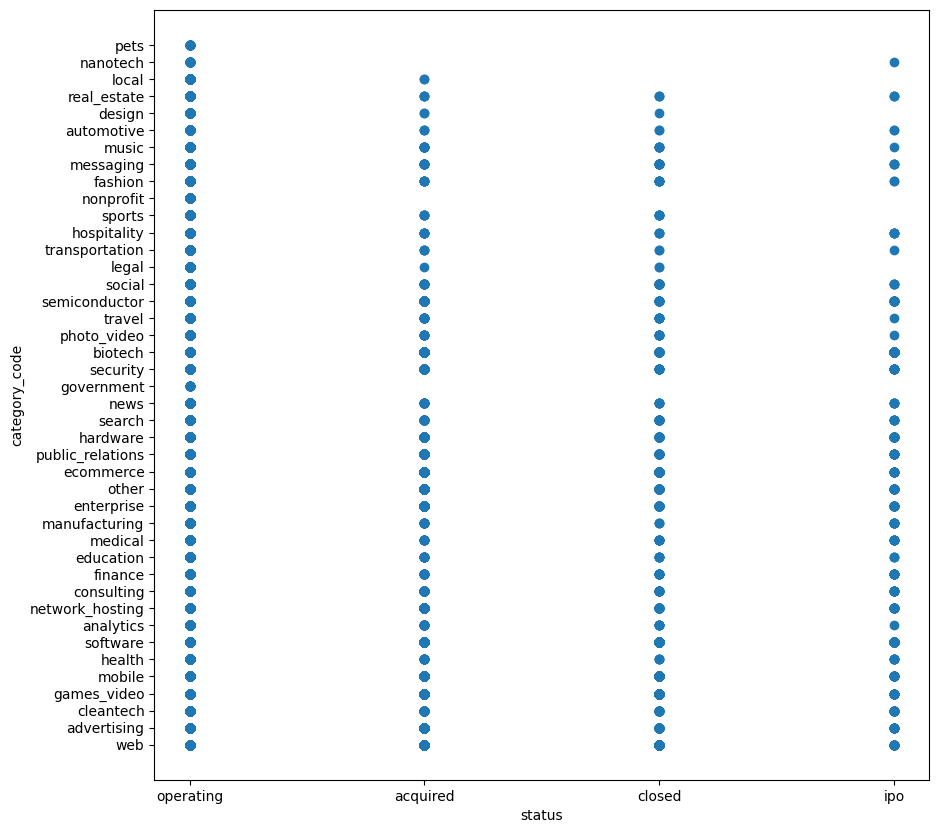

In [41]:
plot('status','category_code',data=data)

Scatterplot between status and category code columns.

There are each category of company present in each status of company.

Equally distributed, between status

Scatterpot between funding_total_usd and category_code


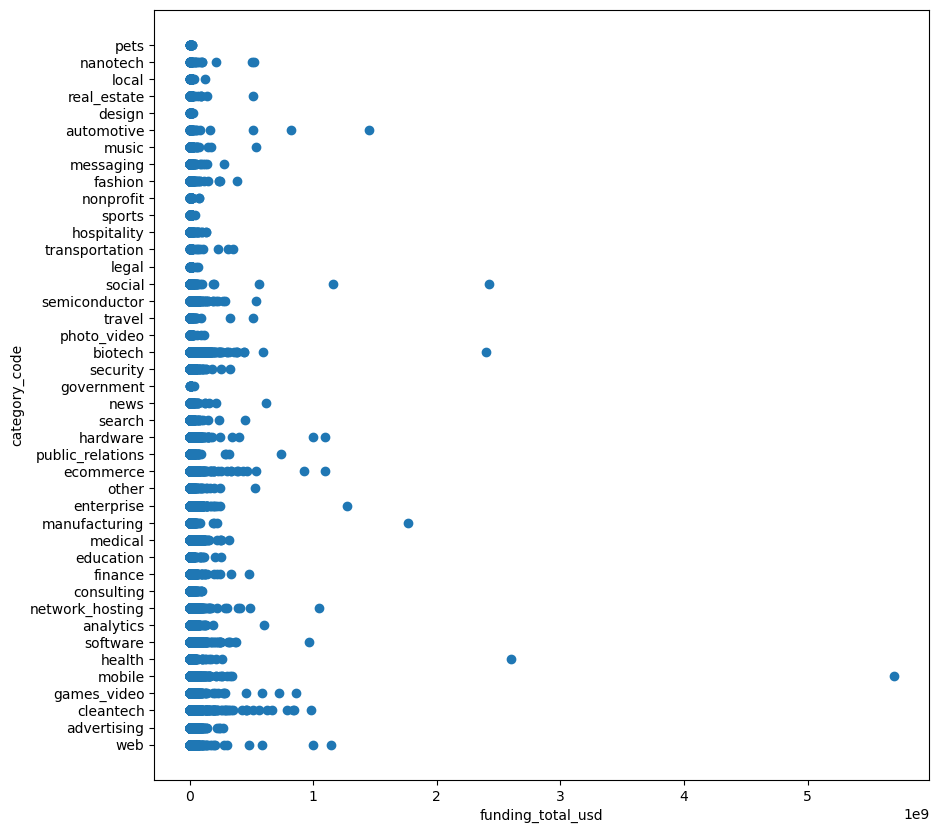

In [42]:
plot(x='funding_total_usd',y='category_code',data=data)

Scatterplot between Total funding and category code.

Mobile sector are having large amount of funding.

Then, Health,Social and biotech are next large amount of funding.

Manufacturing is the next in terms of fundings.

And the design category is funding the smallest amount among all.

Scatterpot between investment_rounds and category_code


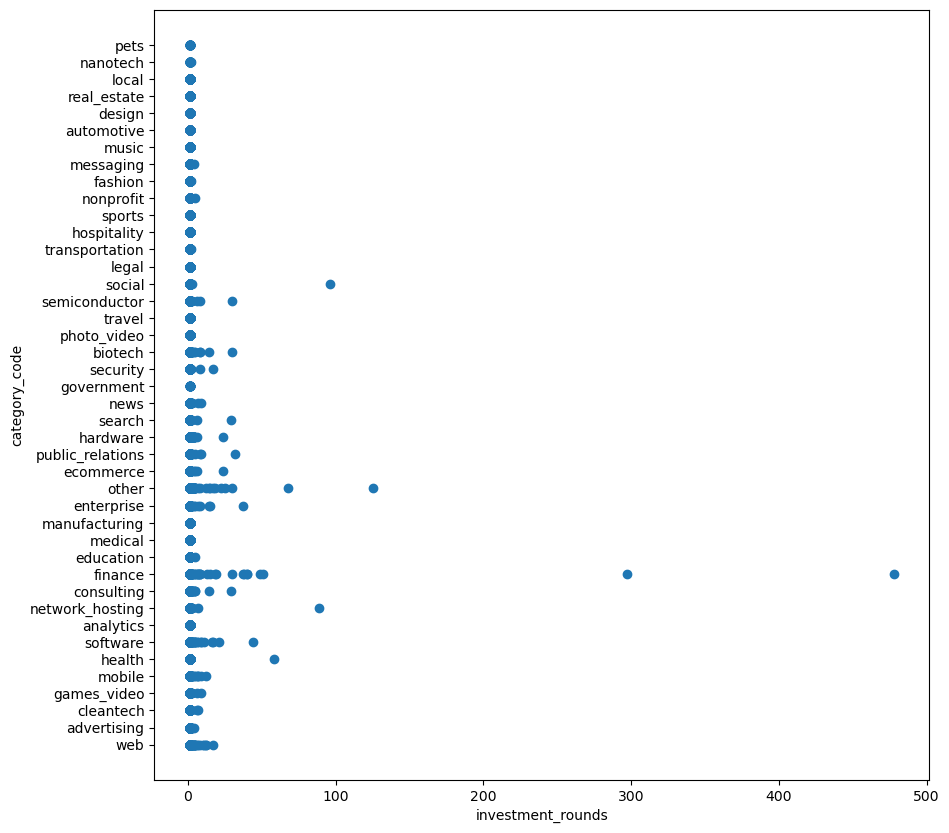

In [44]:
plot(x='investment_rounds',y='category_code',data=data)

Scatterplot between Investment Rounds and category code.

Finance sector is the highest in investing rounds.

Other category is the top 2 in investing rounds

Next are, Social and netwrok hosting and are on the same line in investing rounds

Most of the category lies on the same rounds and its hard to analysis which one is having lowest investing rounds.

Scatterpot between funding_rounds and category_code


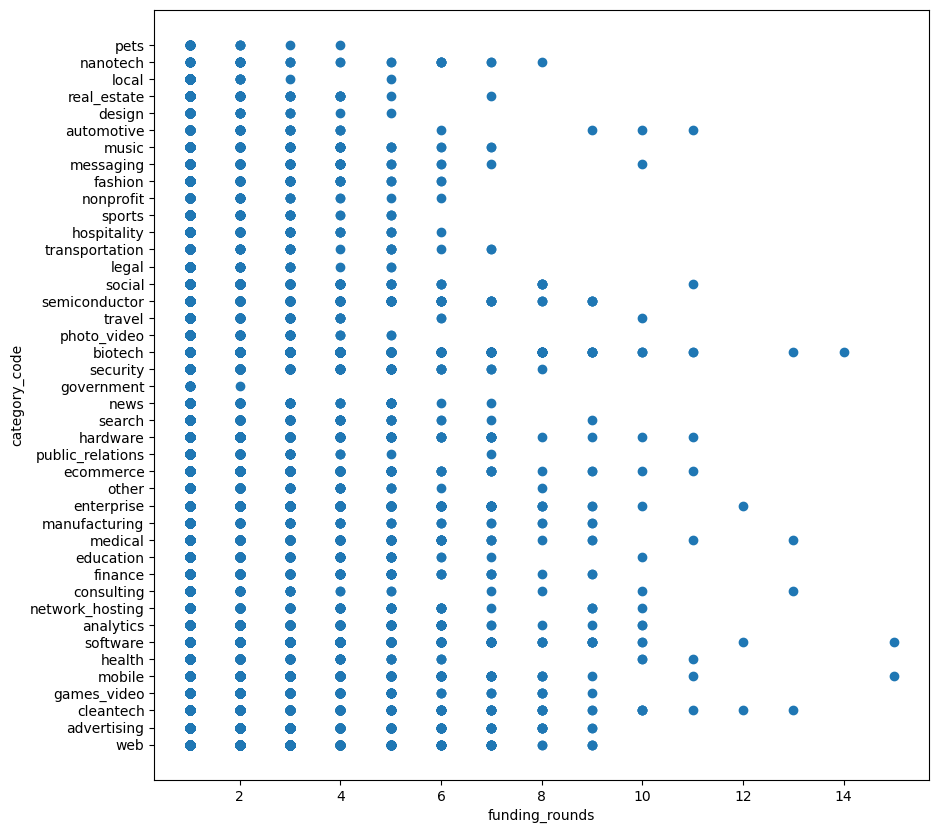

In [46]:
plot(x='funding_rounds',y='category_code',data=data)

Scatterplot between Funding Rounds and category code.

    Mobile and software are the top category in funding rounds.

    Biotech is on the 2nd in funding rounds.

    Medical is the next in funding rounds.

    And Government and Local categories are the lowest in the funding rounds.

Scatterpot between relationships and category_code


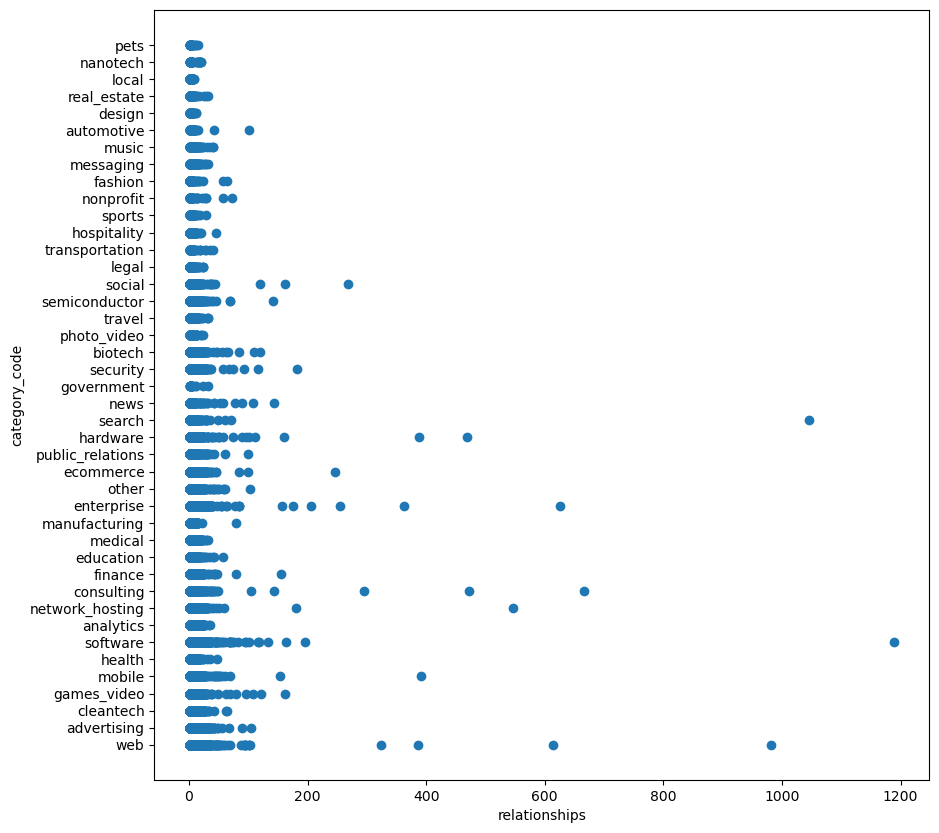

In [47]:
plot(x='relationships',y='category_code',data=data)

Scatterplot between Relationship and category code.

    Software category has the stronges relationship.
    
    Search and web are on the same scale in terms of relationship.
    
    Consulting category is the next in relationship.
    
    Local category is having the weakest relationship

Scatterpot between invested_companies and category_code


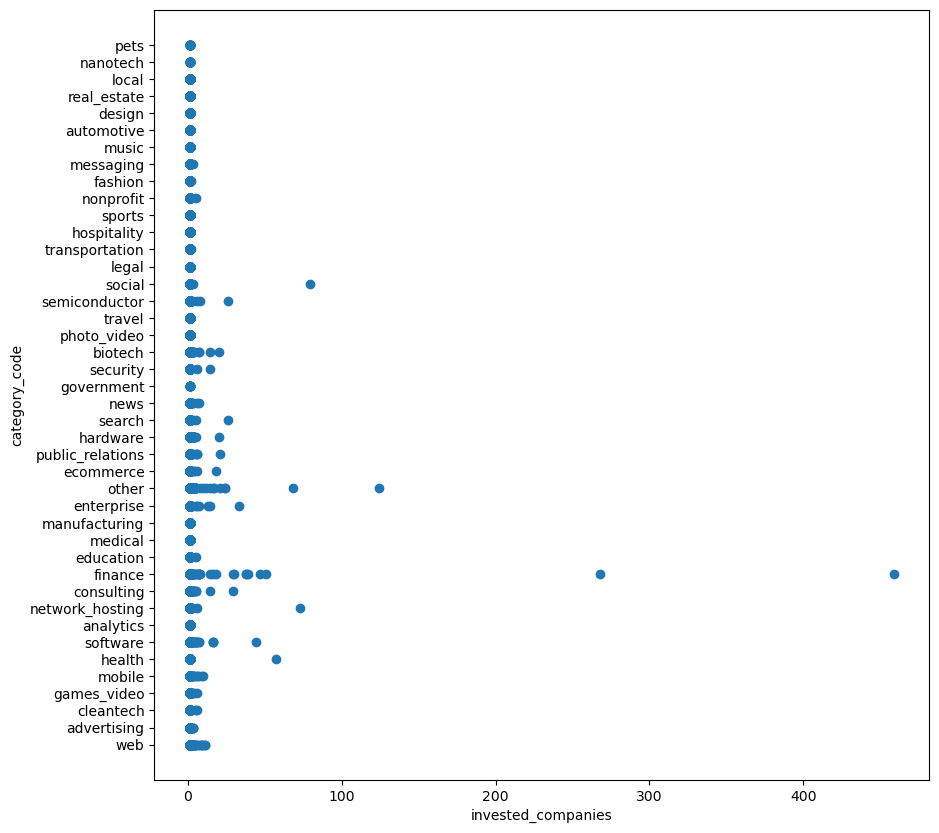

In [48]:
plot(x='invested_companies',y='category_code',data=data)

Scatterplot between Invested companies and category code.

Finance category has the most of the invested companies.

Other are the another category having the most of the invested companies.

Network hosting and Social are the top 3rd in invested companies.

And, there are many category having the lowest invested companies, like, Pets, Nanotech, Local, Real Estate and many more.

Scatterpot between milestones and category_code


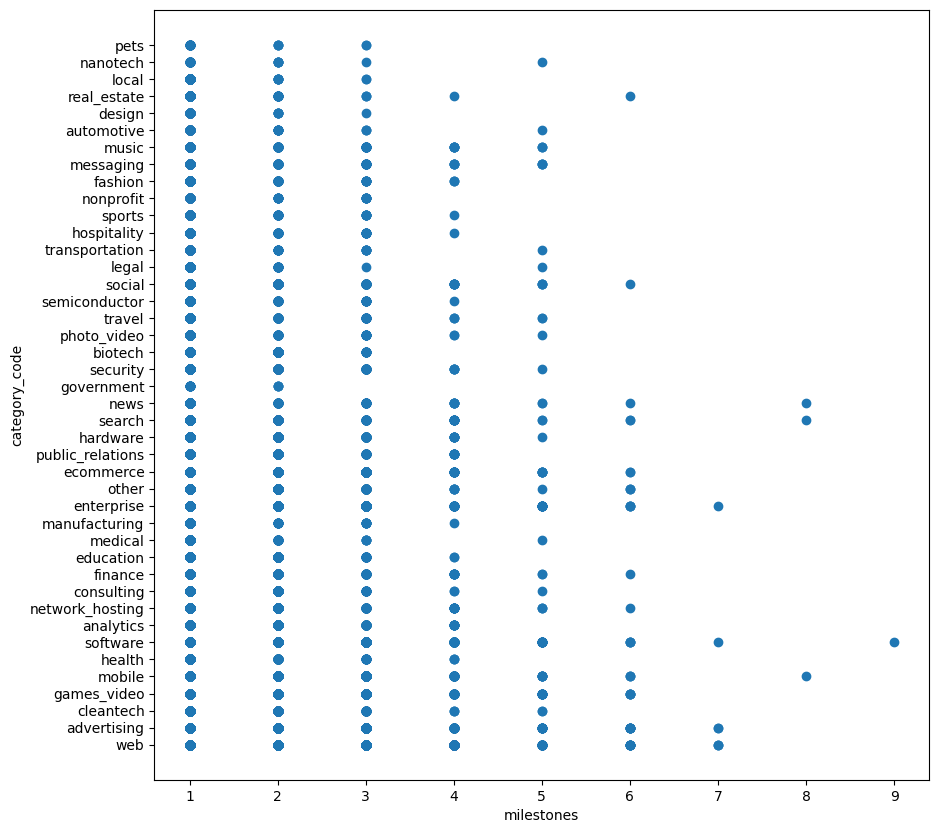

In [49]:
plot(x='milestones',y='category_code',data=data)

Scatterplot between Milestones and category code.

Top Categories in terms of Milestones are:

Software.

Mobile, Search, News all lies on the same scale.

Web, Advertising, Enterprise are the next and on the same scale.

Lowest categories in terms of Milestones:

Government.

Pets, Local, Non-Profit are on the same scale.


In [50]:
def splot(x,y,data):
    plt.scatter(x,y,data=data)
    plt.xlabel(x)
    plt.ylabel(y)
    print('Scatterpot between',x,'and',y)
    plt.show()

Scatterpot between status and funding_total_usd


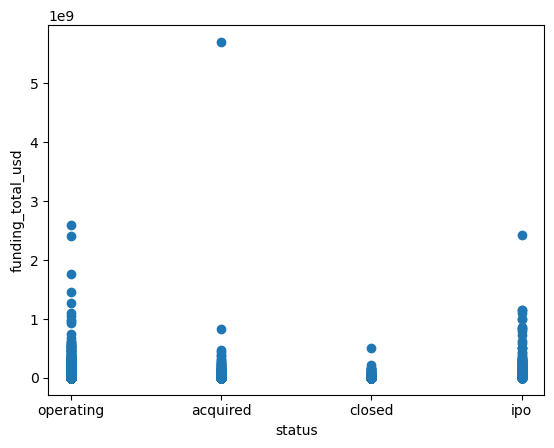

In [51]:
splot(y='funding_total_usd',x='status',data=data)

Scatterplot between Total Funding and Status.

Top to down in Total Funding:
    
Acquired

Operating

IPO

Closed


Scatterpot between status and investment_rounds


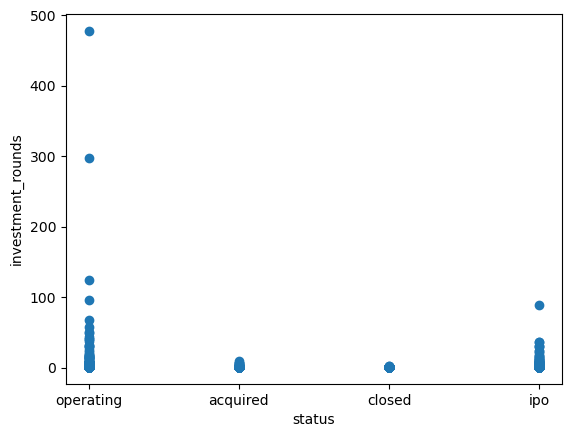

In [53]:
splot(y ='investment_rounds',x ='status',data=data)

Scatterplot between Investment Rounds and Status.

Top to down in Investment Rounds:
    
Operating

IPO

Acquired

Closed


Scatterpot between status and funding_rounds


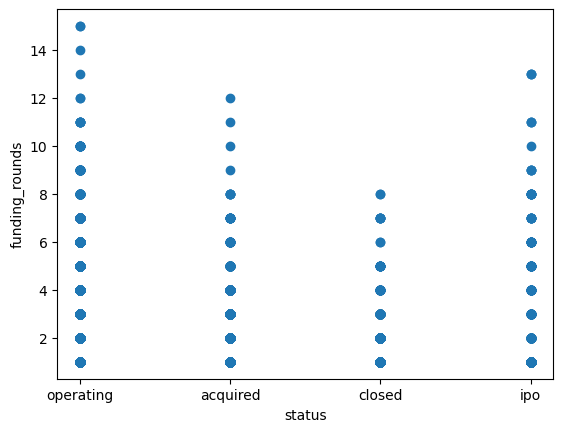

In [55]:
splot(y ='funding_rounds',x ='status',data=data)

Scatterplot between Funding Rounds and Status.

Top to down in Funding Rounds:
    
Operating

IPO

Acquired

Closed

Scatterpot between status and invested_companies


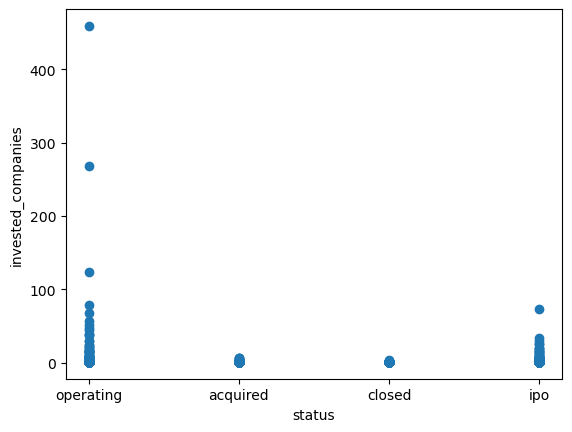

In [57]:
splot(y ='invested_companies',x ='status',data=data)

Scatterpot between status and relationships


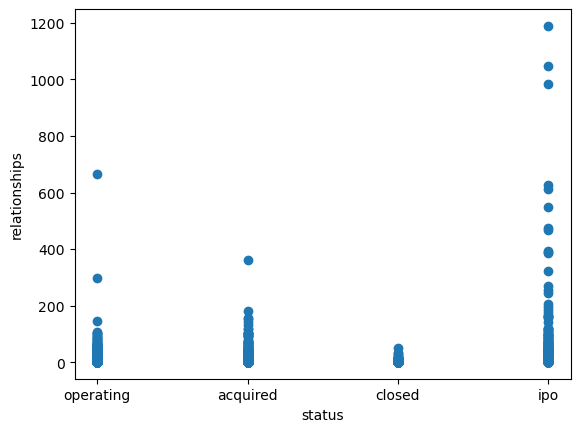

In [58]:
splot(y ='relationships',x ='status',data=data)

Scatterpot between status and milestones


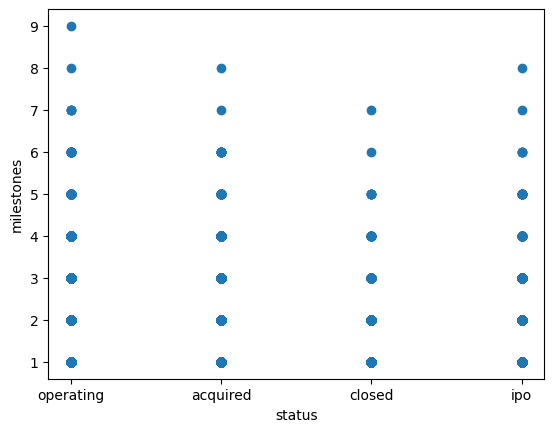

In [59]:
splot(y ='milestones',x ='status',data=data)

Scatterpot between status and ROI


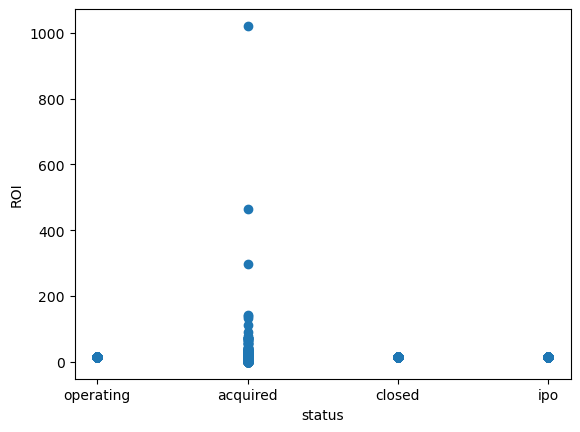

In [60]:
splot(y ='ROI',x ='status',data=data)

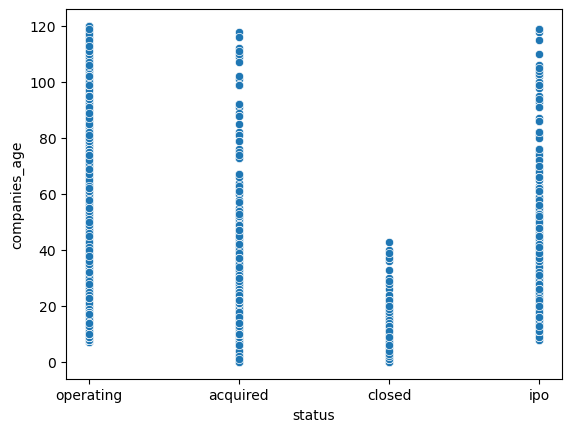

In [62]:
sns.scatterplot(y = 'companies_age',x='status',data=data)
plt.show()

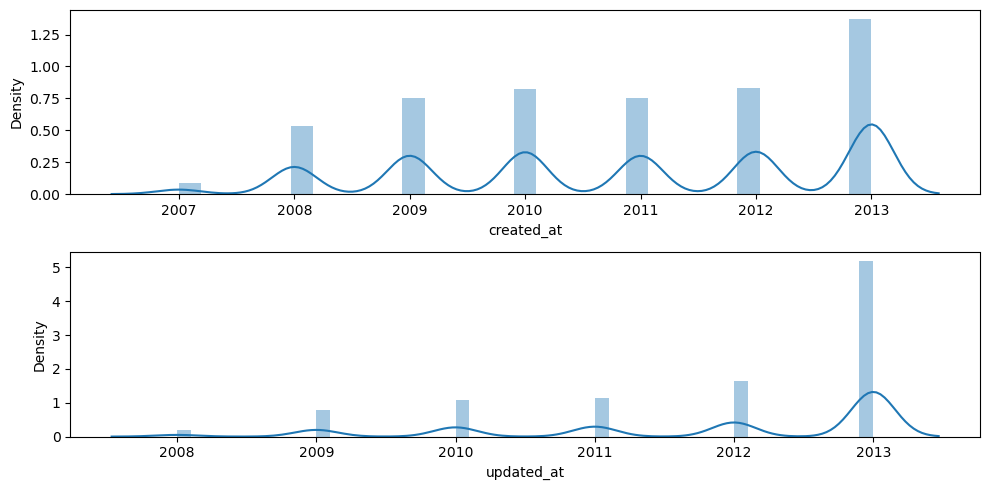

In [63]:
plt.figure(figsize=(10,5))
plotnumber = 1

for column in data[['created_at','updated_at']]:
    if plotnumber <= 2:
        ax = plt.subplot(2,1,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 10)
    
    plotnumber+=1
plt.tight_layout()

<Axes: xlabel='status', ylabel='Count'>

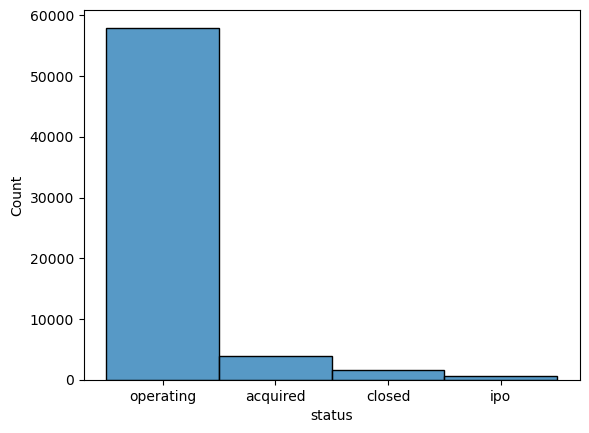

In [64]:
sns.histplot(data.status,bins=10)

- Histplot of our target columns i.e. status

<Axes: xlabel='category_code', ylabel='Count'>

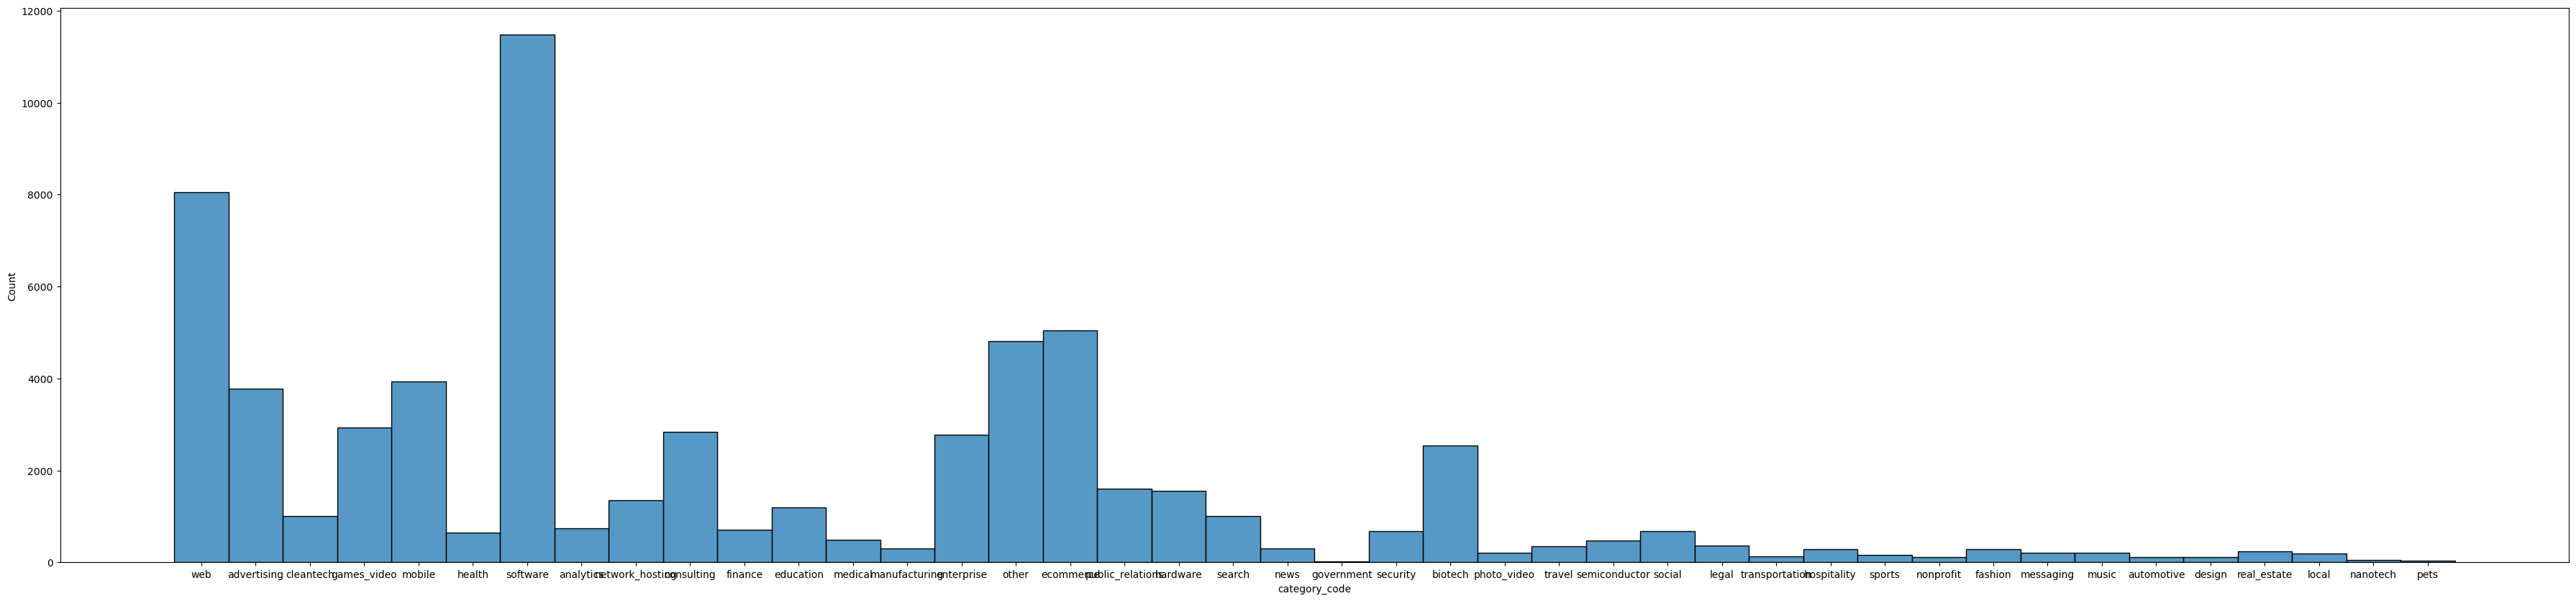

In [65]:
plt.figure(figsize= (45,10))
sns.histplot(data.category_code)

Top 10 category in category_code are:

Software.

Web.

Ecommerce.

other.

Mobile.

Advertising.

Games_video.

Consulting.

Enterprise.

Biotech.


- Histplot for the category code.

<Axes: xlabel='country_code', ylabel='Count'>

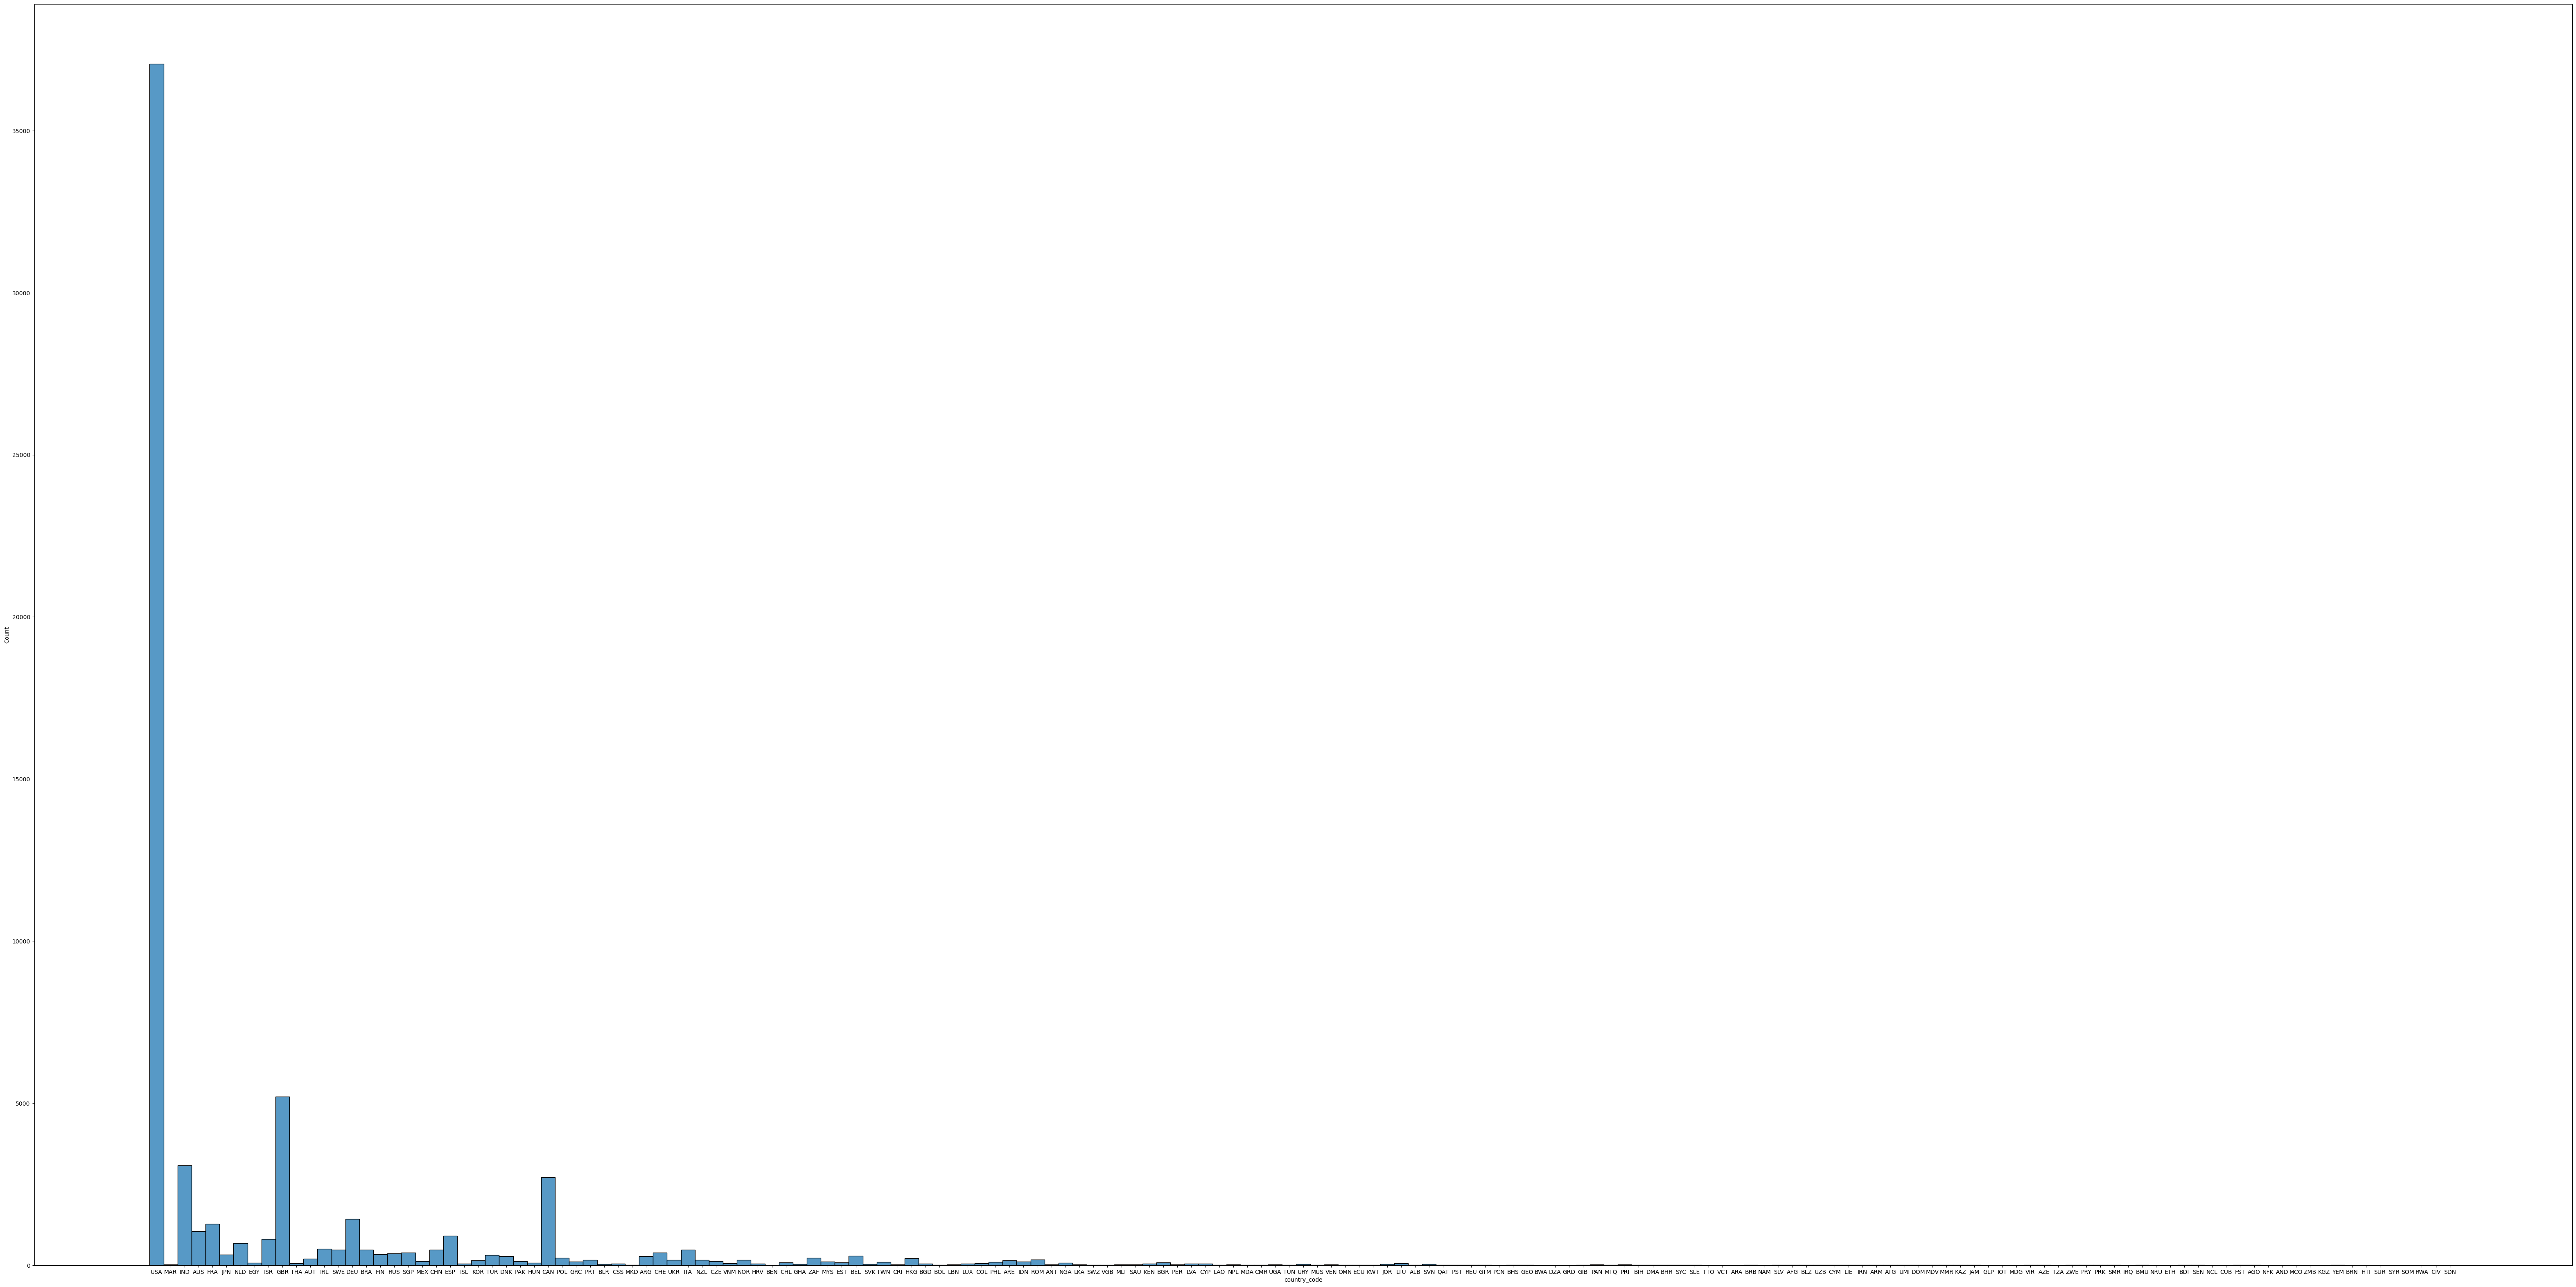

In [67]:
plt.figure(figsize= (80,40))
sns.histplot(data['country_code'])

# Correlation :

In [69]:

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate correlation matrix
df_corr = numeric_data.corr().abs()

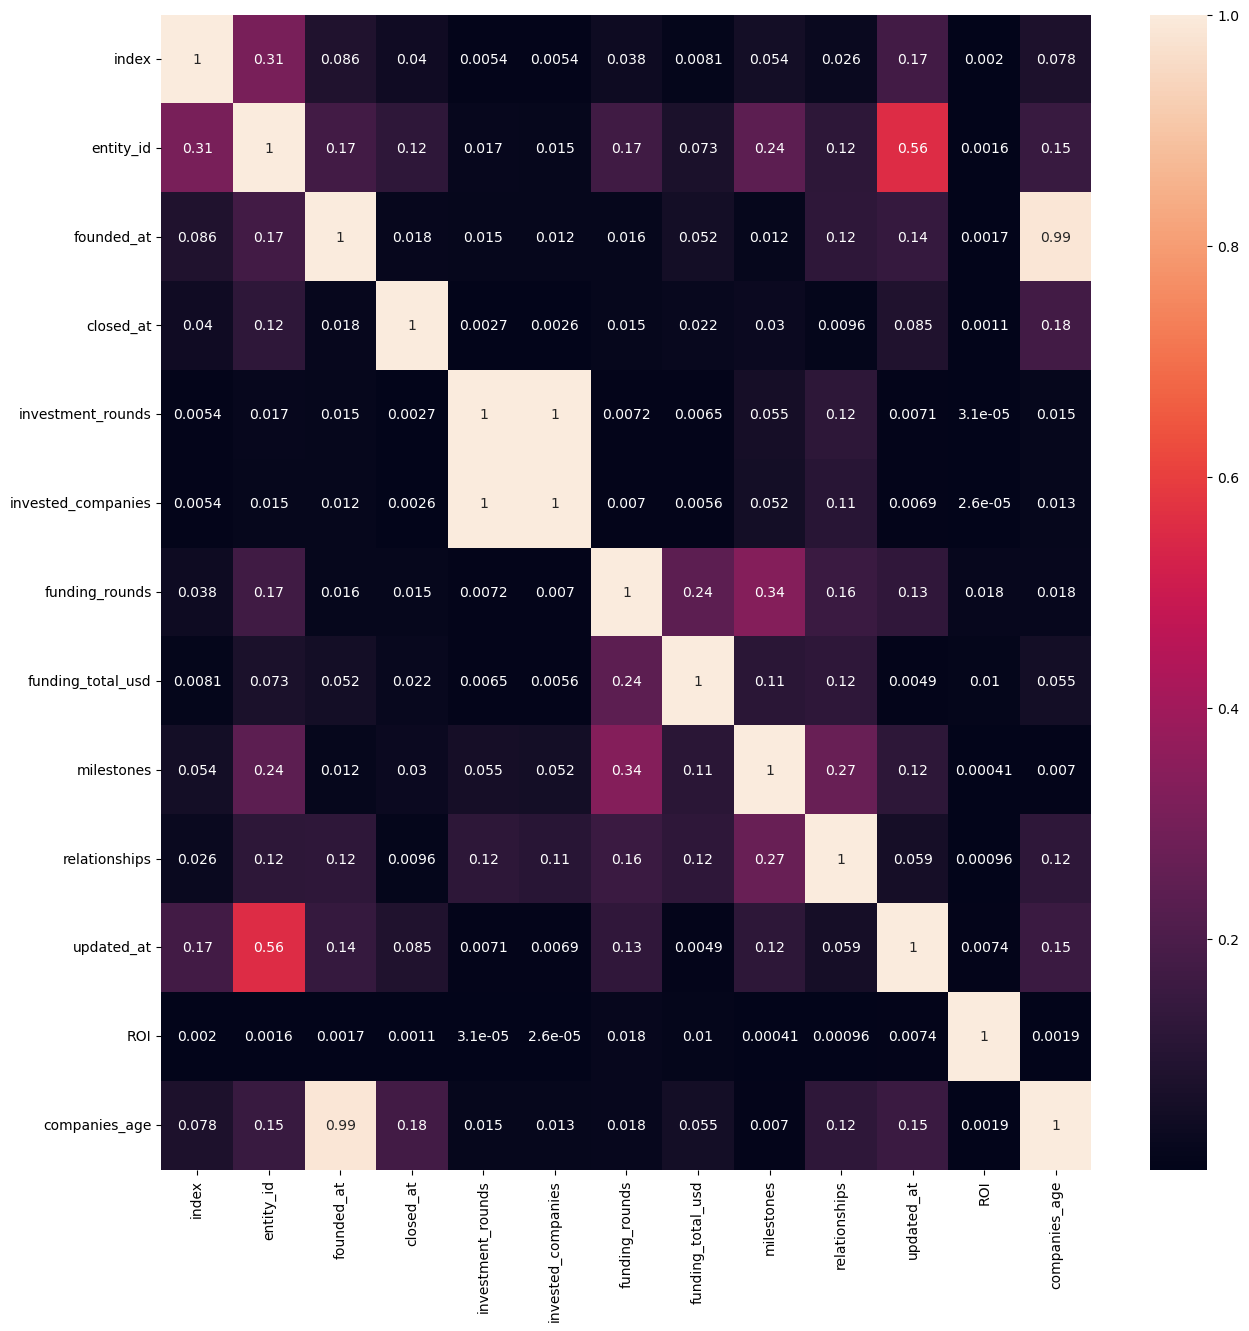

In [70]:
plt.figure(figsize = (15,15))
sns.heatmap(df_corr, annot = True)
plt.show()

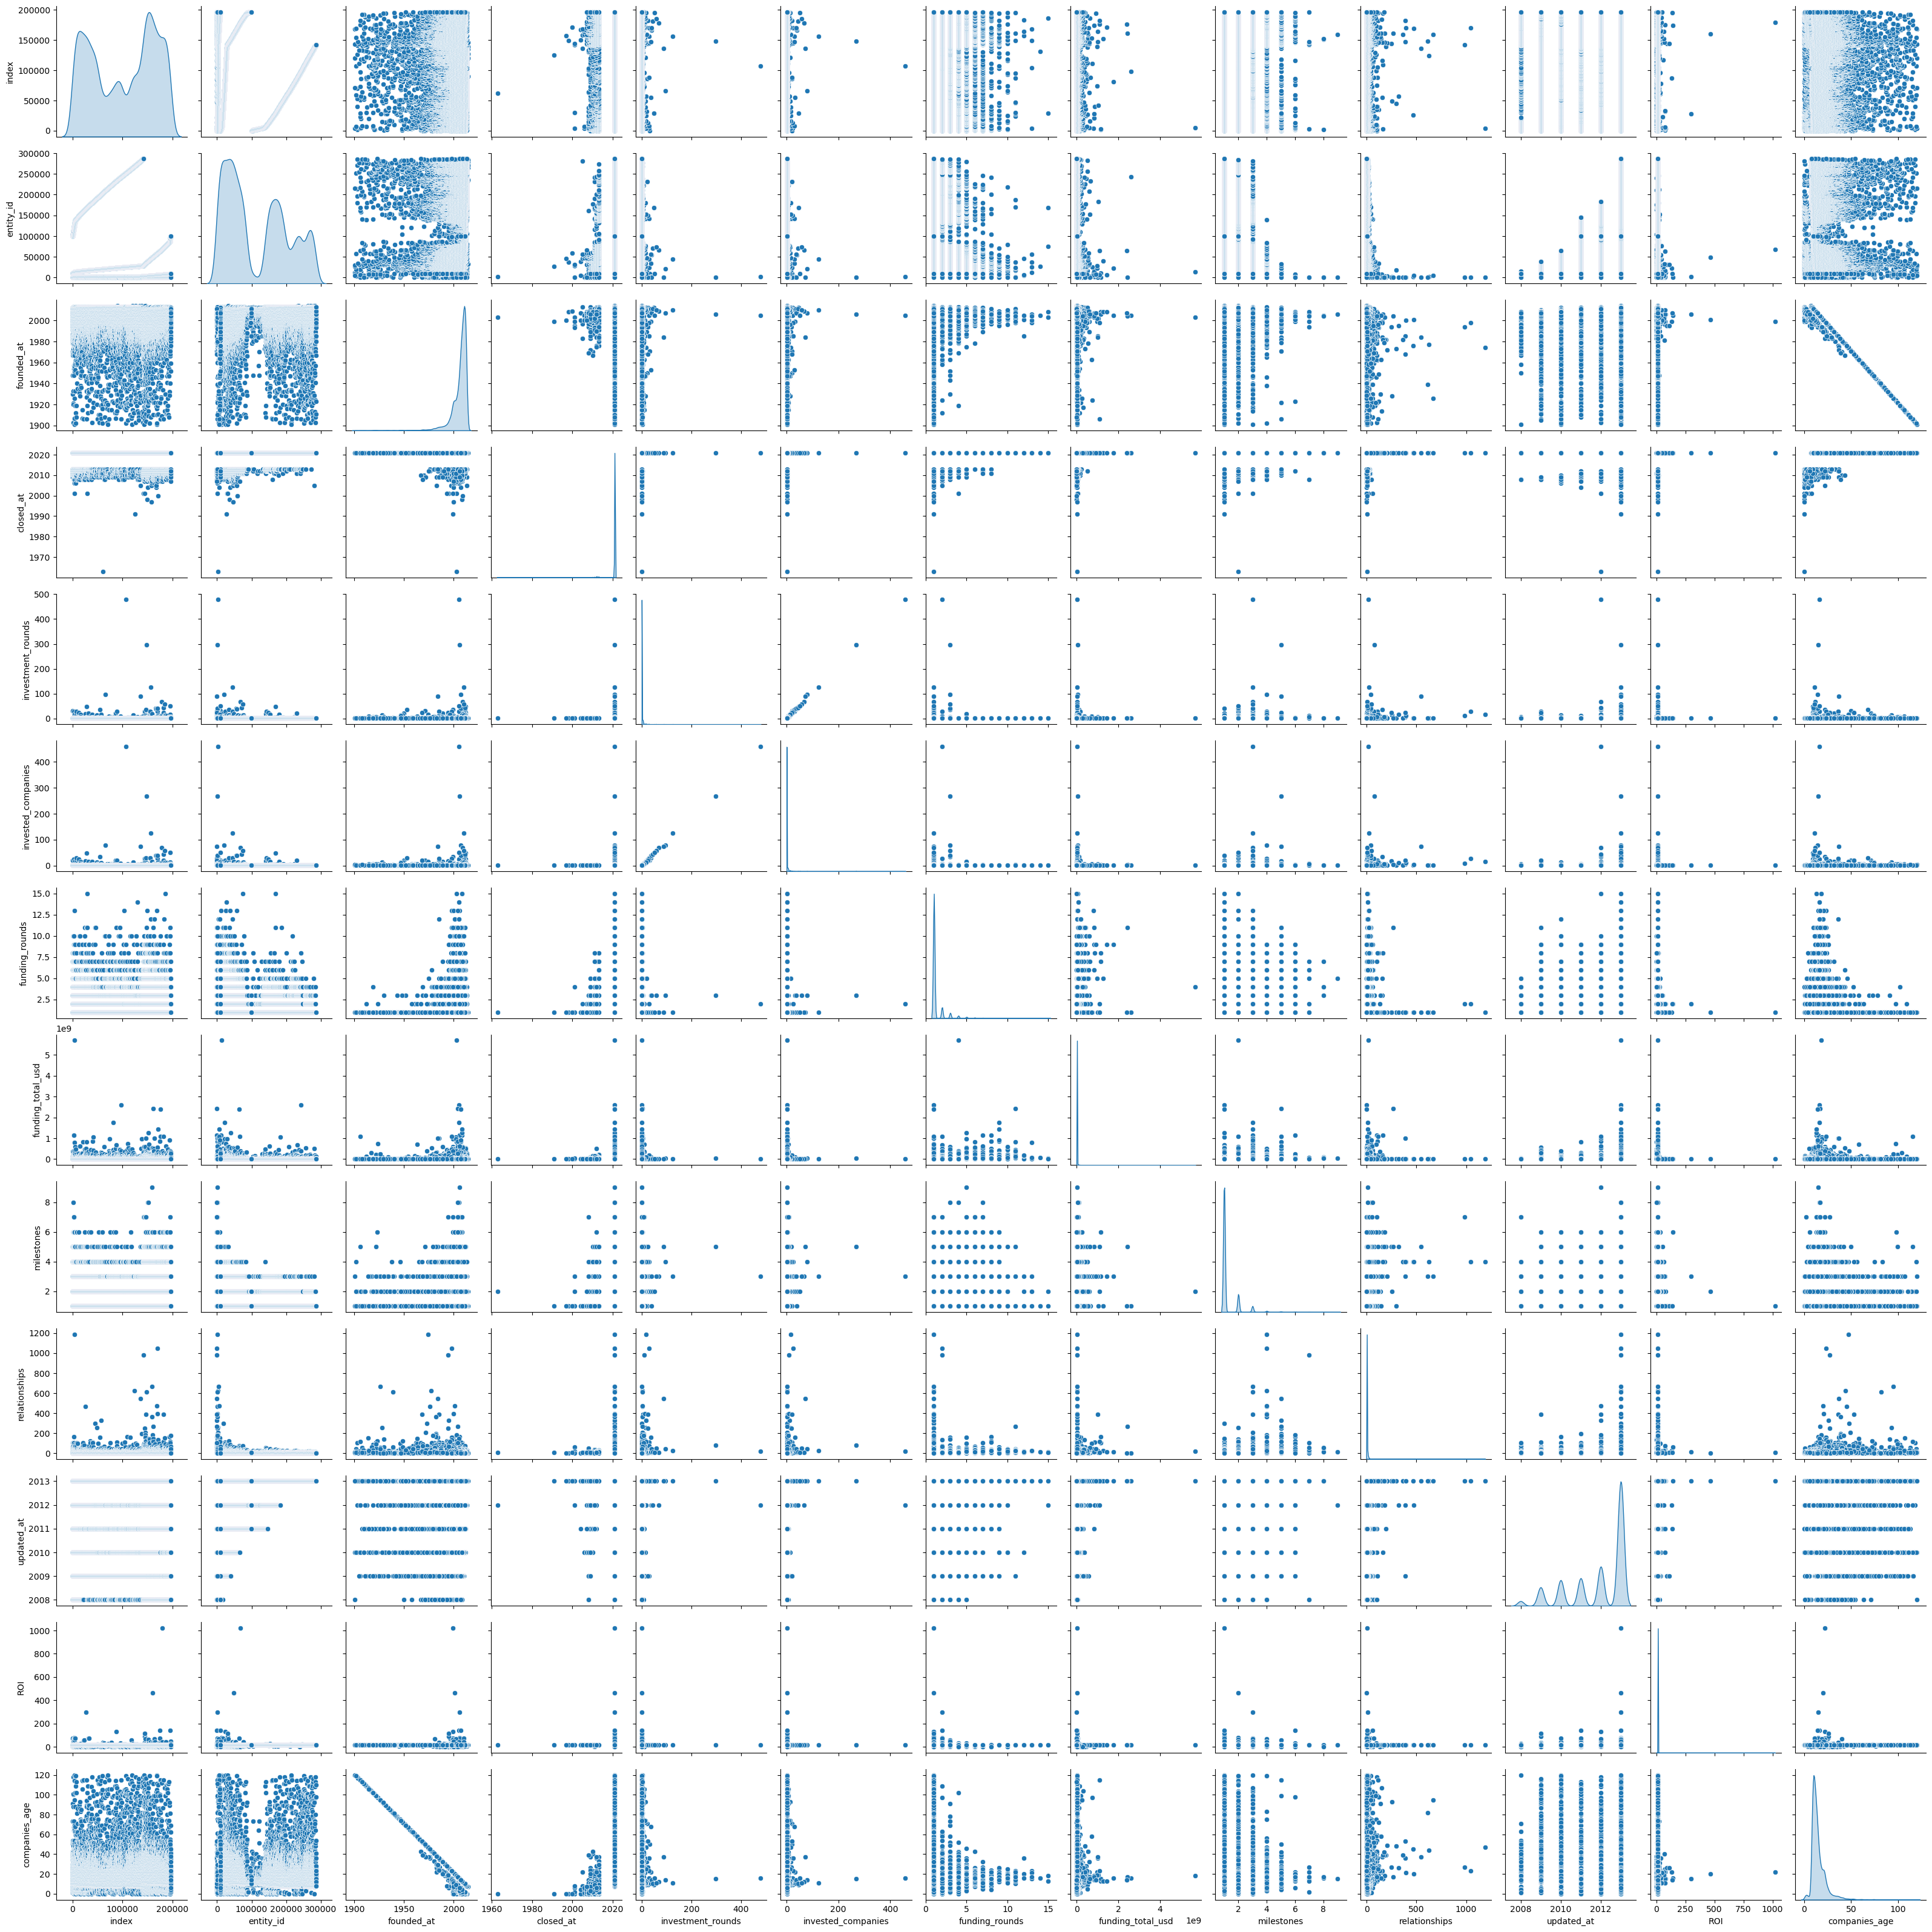

In [71]:
sns.pairplot(data, diag_kind = 'kde')

Plotting pairplot on the dataset.

# Normal Distribution :

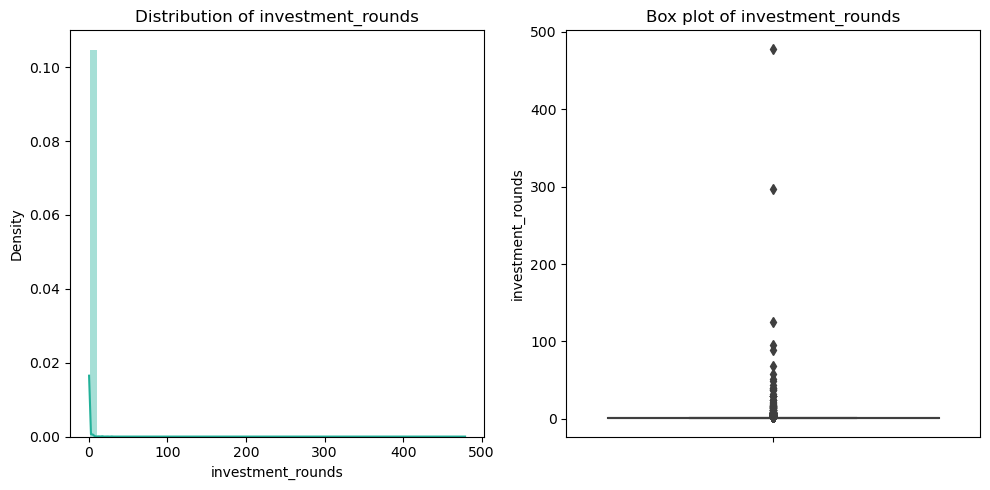

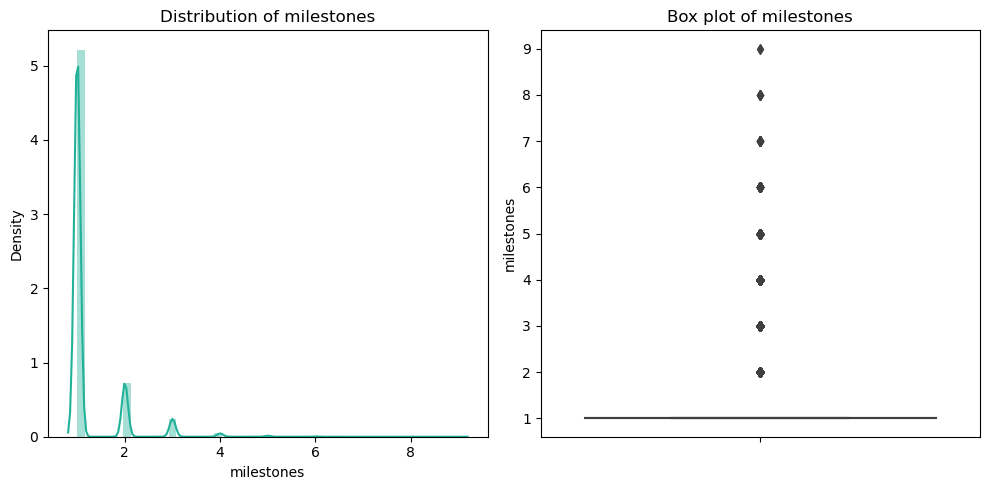

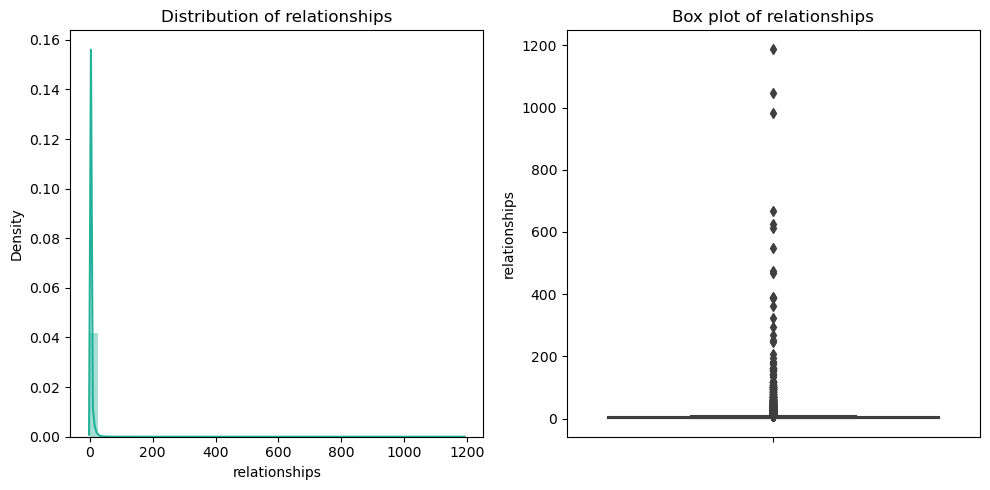

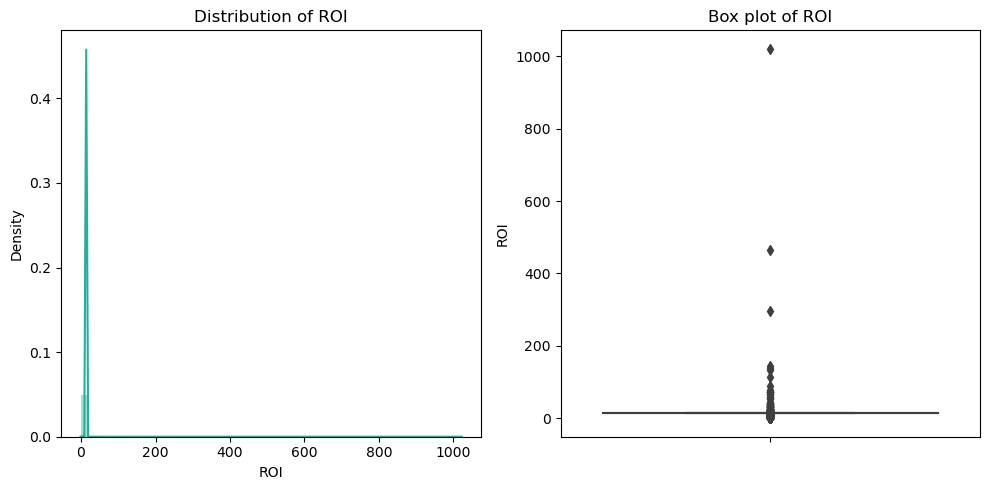

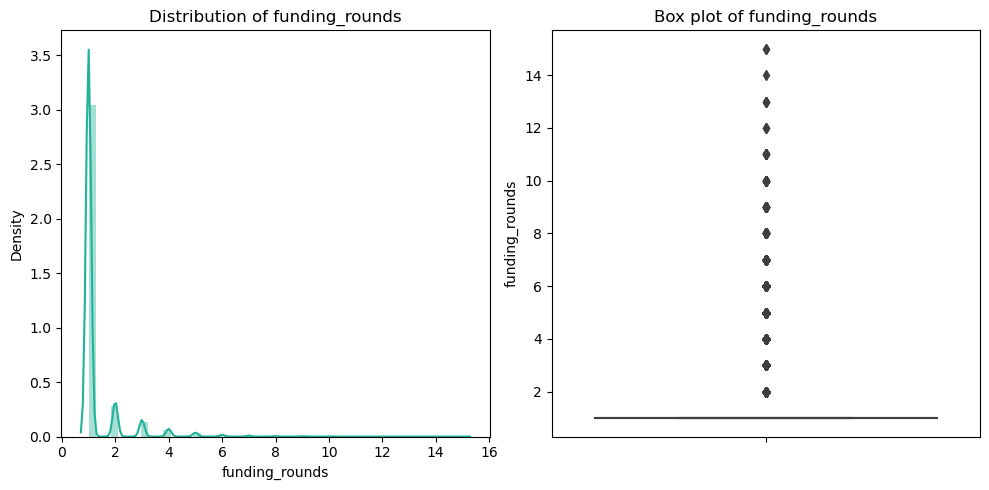

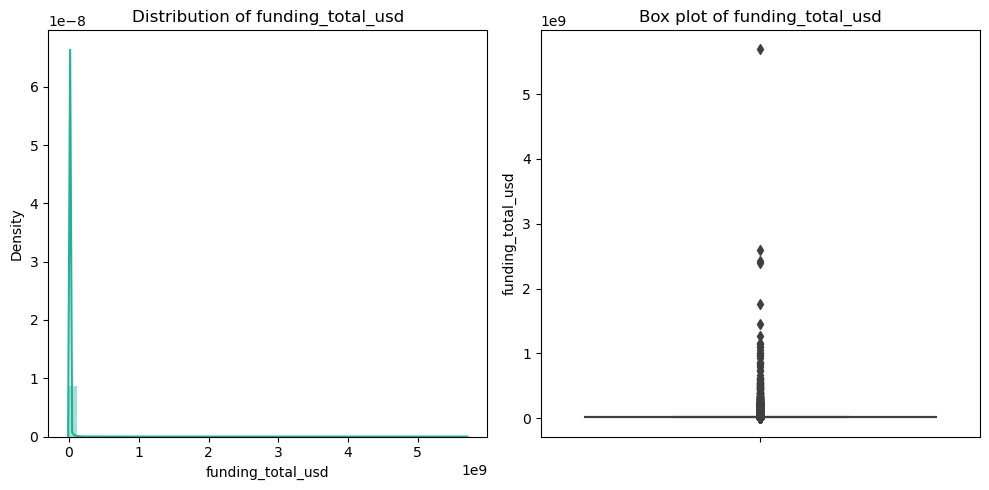

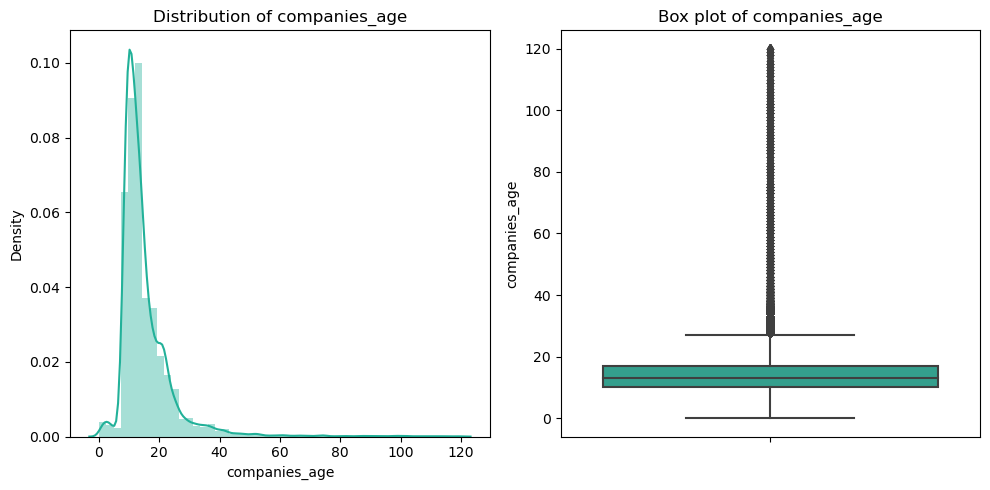

(64094, 18)


In [74]:
def check_outliers(x):
    global data
    fig, axes = plt.subplots(1,2,figsize=(10,5))
    sns.distplot(data[x],color='#22b199',ax=axes[0])
    sns.boxplot(y=data[x],color='#22b199',ax=axes[1])
    axes[0].set_title('Distribution of ' + x)
    axes[1].set_title('Box plot of '+ x)
    plt.tight_layout()
    plt.show()

for i in ['investment_rounds','milestones', 'relationships', 'ROI', 'funding_rounds' ,'funding_total_usd','companies_age']:
    check_outliers(i)
    
print(data.shape)

# Before Removing Outliers:

In [75]:
data[['funding_total_usd','funding_rounds']].describe()

,funding_total_usd,funding_rounds
count,6.409400e+04,64094.000000
mean,1.581978e+07,1.287749
std,3.950322e+07,0.873294
min,2.910000e+02,1.000000
25%,1.500000e+07,1.000000
50%,1.581978e+07,1.000000
75%,1.581978e+07,1.000000
max,5.700000e+09,15.000000


In [78]:
data = data.apply(pd.to_numeric, errors='coerce')

In [79]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1

In [80]:
high = (q3.funding_total_usd + (1.5 * iqr.funding_total_usd))
print(high)

index = np.where(data['funding_total_usd'] > high)
print(index)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

17049455.46631492
(array([    0,     7,    10, ..., 64031, 64065, 64078], dtype=int64),)
(60069, 18)


,level_0,index,entity_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,ROI,companies_age
0,1,5,10002,NaN,NaN,NaN,2007,2021.0,NaN,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008,2008,14.41045,14.0
1,2,6,10003,NaN,NaN,NaN,2008,2021.0,NaN,1.0,1.0,1.0,1.581978e+07,1.0,4.43465,2008,2010,14.41045,13.0
2,3,12,10009,NaN,NaN,NaN,2008,2021.0,NaN,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008,2008,14.41045,13.0
3,4,13,1001,NaN,NaN,NaN,2007,2021.0,NaN,1.0,1.0,1.0,5.000000e+06,3.0,14.00000,2007,2013,9.50000,14.0
4,5,15,10011,NaN,NaN,NaN,2008,2021.0,NaN,1.0,1.0,1.0,1.581978e+07,1.0,3.00000,2008,2009,14.41045,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60064,64089,196548,99940,NaN,NaN,NaN,2007,2021.0,NaN,1.0,1.0,1.0,1.581978e+07,2.0,5.00000,2011,2013,14.41045,14.0
60065,64090,196549,9995,NaN,NaN,NaN,2007,2021.0,NaN,1.0,1.0,1.0,7.500000e+05,1.0,14.00000,2008,2013,14.41045,14.0
60066,64091,196550,9996,NaN,NaN,NaN,1959,2021.0,NaN,1.0,1.0,1.0,1.581978e+07,3.0,44.00000,2008,2013,14.41045,62.0
60067,64092,196551,9997,NaN,NaN,NaN,2008,2021.0,NaN,1.0,1.0,1.0,1.581978e+07,1.0,1.00000,2008,2013,14.41045,13.0


In [81]:
high_fu = (q3.funding_rounds + (1.5 * iqr.funding_rounds))
print(high_fu)

index_fu = np.where(data['funding_rounds'] > high)
print(index_fu)

data = data.drop(data.index[index_fu])
print(data.shape)

data.reset_index()

1.0
(array([], dtype=int64),)
(60069, 18)


,level_0,index,entity_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,ROI,companies_age
0,1,5,10002,NaN,NaN,NaN,2007,2021.0,NaN,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008,2008,14.41045,14.0
1,2,6,10003,NaN,NaN,NaN,2008,2021.0,NaN,1.0,1.0,1.0,1.581978e+07,1.0,4.43465,2008,2010,14.41045,13.0
2,3,12,10009,NaN,NaN,NaN,2008,2021.0,NaN,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008,2008,14.41045,13.0
3,4,13,1001,NaN,NaN,NaN,2007,2021.0,NaN,1.0,1.0,1.0,5.000000e+06,3.0,14.00000,2007,2013,9.50000,14.0
4,5,15,10011,NaN,NaN,NaN,2008,2021.0,NaN,1.0,1.0,1.0,1.581978e+07,1.0,3.00000,2008,2009,14.41045,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60064,64089,196548,99940,NaN,NaN,NaN,2007,2021.0,NaN,1.0,1.0,1.0,1.581978e+07,2.0,5.00000,2011,2013,14.41045,14.0
60065,64090,196549,9995,NaN,NaN,NaN,2007,2021.0,NaN,1.0,1.0,1.0,7.500000e+05,1.0,14.00000,2008,2013,14.41045,14.0
60066,64091,196550,9996,NaN,NaN,NaN,1959,2021.0,NaN,1.0,1.0,1.0,1.581978e+07,3.0,44.00000,2008,2013,14.41045,62.0
60067,64092,196551,9997,NaN,NaN,NaN,2008,2021.0,NaN,1.0,1.0,1.0,1.581978e+07,1.0,1.00000,2008,2013,14.41045,13.0


# After Removing Outliers:


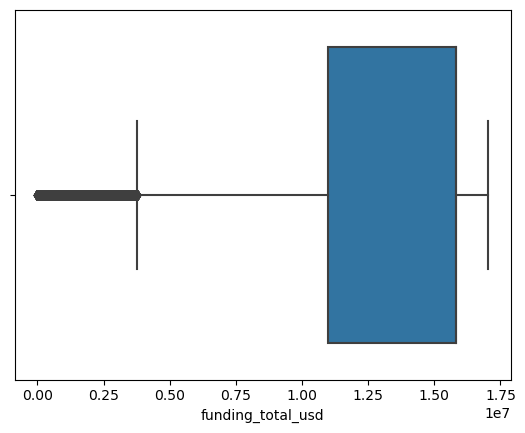

In [83]:
sns.boxplot(x=data['funding_total_usd'])
plt.show()

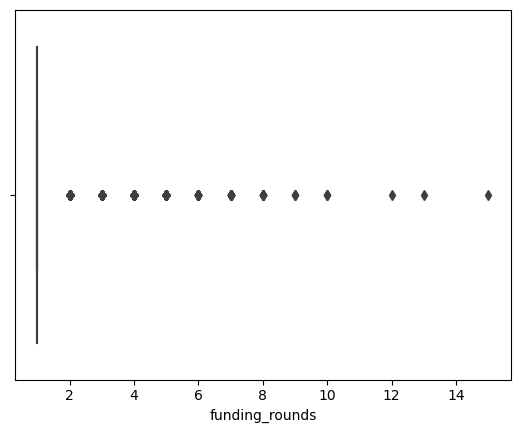

In [85]:
sns.boxplot(x=data['funding_rounds'])
plt.show()

In [86]:
'''def remove_outliers(x):
    global data
    Q1= data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    
    index = np.where(data[x] > upper_limit)
    data = data.drop(data.index[index])
    data.reset_index()
        
    fig, axes = plt.subplots(1,2,figsize=(10,5))
    sns.distplot(data[x],color='#22b199',ax=axes[0])
    sns.boxplot(y=data[x],color='#22b199',ax=axes[1])
    axes[0].set_title('Distribution of '+ x )
    axes[1].set_title('Box plot of '+ x)
    plt.tight_layout()
    plt.show()

for i in ['investment_rounds','milestones', 'relationships', 'ROI', 'funding_rounds' ,'funding_total_usd','companies_age','invested_companies']:
    remove_outliers(i)
print(data.shape)'''

"def remove_outliers(x):\n    global data\n    Q1= data[x].quantile(0.25)\n    Q3 = data[x].quantile(0.75)\n    IQR = Q3 - Q1\n    upper_limit = Q3 + 1.5 * IQR\n    \n    index = np.where(data[x] > upper_limit)\n    data = data.drop(data.index[index])\n    data.reset_index()\n        \n    fig, axes = plt.subplots(1,2,figsize=(10,5))\n    sns.distplot(data[x],color='#22b199',ax=axes[0])\n    sns.boxplot(y=data[x],color='#22b199',ax=axes[1])\n    axes[0].set_title('Distribution of '+ x )\n    axes[1].set_title('Box plot of '+ x)\n    plt.tight_layout()\n    plt.show()\n\nfor i in ['investment_rounds','milestones', 'relationships', 'ROI', 'funding_rounds' ,'funding_total_usd','companies_age','invested_companies']:\n    remove_outliers(i)\nprint(data.shape)"

In [87]:
'''Q1= data['funding_total_usd'].quantile(0.25)
Q3 = data['funding_total_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
    
index = np.where(data['funding_total_usd'] < lower_limit)
data = data.drop(data.index[index])
data.reset_index()
        
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(data['funding_total_usd'],color='#22b199',ax=axes[0])
sns.boxplot(y=data['funding_total_usd'],color='#22b199',ax=axes[1])
axes[0].set_title('Distribution of funding_total_usd without outliers')
axes[1].set_title('Box plot of funding_total_usd')
plt.tight_layout()
plt.show()

print(data.shape)'''


"Q1= data['funding_total_usd'].quantile(0.25)\nQ3 = data['funding_total_usd'].quantile(0.75)\nIQR = Q3 - Q1\nlower_limit = Q1 - 1.5 * IQR\n    \nindex = np.where(data['funding_total_usd'] < lower_limit)\ndata = data.drop(data.index[index])\ndata.reset_index()\n        \nfig, axes = plt.subplots(1,2,figsize=(10,5))\nsns.distplot(data['funding_total_usd'],color='#22b199',ax=axes[0])\nsns.boxplot(y=data['funding_total_usd'],color='#22b199',ax=axes[1])\naxes[0].set_title('Distribution of funding_total_usd without outliers')\naxes[1].set_title('Box plot of funding_total_usd')\nplt.tight_layout()\nplt.show()\n\nprint(data.shape)"

# Encoding :

- Encoding the Category Code column by replace method.

In [90]:
data['category_code'] = data['category_code'].replace(['public_relations','hardware','network_hosting','education','search','cleantech','analytics','finance','social','security','health','medical','semiconductor','legal','travel','news','manufacturing','fashion','hospitality','real_estate','photo_video','messaging','music','local','sports','transportation','nonprofit','automotive','design','nanotech','pets','government'],'other')

In [91]:
data['category_code'].value_counts()

Series([], Name: count, dtype: int64)

 Encoding the Country code column,

In [92]:
top = ['USA','GBR','IND','CAN','DEU','FRA','AUS','ESP','ISR','NLD']

In [93]:
data.loc[~data['country_code'].isin(top),'country_code'] = 'other'

In [116]:
data['country_code'].value_counts()

country_code
other    60069
Name: count, dtype: int64

- Get dummies method on dataset.

data = pd.get_dummies(data, columns = ['category_code','country_code'])

data.drop(columns = ['name','invested_companies'],inplace = True)

In [95]:
data.shape

(60069, 18)

# Imbalanced Target Column:

In [110]:
data.status.value_counts()
data.head()

,index,entity_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,ROI,companies_age
1,5,10002,NaN,NaN,NaN,2007,2021.0,other,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008,2008,14.41045,14.0
2,6,10003,NaN,NaN,NaN,2008,2021.0,other,1.0,1.0,1.0,1.581978e+07,1.0,4.43465,2008,2010,14.41045,13.0
3,12,10009,NaN,NaN,NaN,2008,2021.0,other,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008,2008,14.41045,13.0
4,13,1001,NaN,NaN,NaN,2007,2021.0,other,1.0,1.0,1.0,5.000000e+06,3.0,14.00000,2007,2013,9.50000,14.0
5,15,10011,NaN,NaN,NaN,2008,2021.0,other,1.0,1.0,1.0,1.581978e+07,1.0,3.00000,2008,2009,14.41045,13.0


In [97]:
data['status'] = data['status'].replace('operating',1)
data['status'] = data['status'].replace('ipo',1)
data['status'] = data['status'].replace('closed',0)
data['status'] = data['status'].replace('acquired',0)

# PCA

In [123]:
X = x_train_nm.copy()
pca = PCA(n_components=2)
pca_X = pca.fit_transform(X)

NameError: name 'x_train_nm' is not defined

In [107]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state = 4)

In [121]:
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import NearMiss

# Drop rows with missing values in y_train
y_train_no_missing = y_train.dropna()

# Convert y_train_no_missing to a numeric type if it's categorical
# For example, if it's a binary variable, you can convert it to 0 and 1
y_train_numeric = y_train_no_missing.map({'other': 0, 'your_label': 1})

# Impute missing values in y_train_numeric with a constant (e.g., 0) or mode
imputer = SimpleImputer(strategy='constant', fill_value=0)
y_train_imputed = imputer.fit_transform(y_train_numeric.values.reshape(-1, 1)).ravel()

# Now, you can use y_train_imputed in the NearMiss algorithm
ds = NearMiss(version=1)
x_train_nm, y_train_nm = ds.fit_resample(x_train, y_train_imputed)



ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by SimpleImputer.

In [109]:
data

,index,entity_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,ROI,companies_age
1,5,10002,NaN,NaN,NaN,2007,2021.0,other,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008,2008,14.41045,14.0
2,6,10003,NaN,NaN,NaN,2008,2021.0,other,1.0,1.0,1.0,1.581978e+07,1.0,4.43465,2008,2010,14.41045,13.0
3,12,10009,NaN,NaN,NaN,2008,2021.0,other,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008,2008,14.41045,13.0
4,13,1001,NaN,NaN,NaN,2007,2021.0,other,1.0,1.0,1.0,5.000000e+06,3.0,14.00000,2007,2013,9.50000,14.0
5,15,10011,NaN,NaN,NaN,2008,2021.0,other,1.0,1.0,1.0,1.581978e+07,1.0,3.00000,2008,2009,14.41045,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64089,196548,99940,NaN,NaN,NaN,2007,2021.0,other,1.0,1.0,1.0,1.581978e+07,2.0,5.00000,2011,2013,14.41045,14.0
64090,196549,9995,NaN,NaN,NaN,2007,2021.0,other,1.0,1.0,1.0,7.500000e+05,1.0,14.00000,2008,2013,14.41045,14.0
64091,196550,9996,NaN,NaN,NaN,1959,2021.0,other,1.0,1.0,1.0,1.581978e+07,3.0,44.00000,2008,2013,14.41045,62.0
64092,196551,9997,NaN,NaN,NaN,2008,2021.0,other,1.0,1.0,1.0,1.581978e+07,1.0,1.00000,2008,2013,14.41045,13.0
